In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import ipywidgets as widgets
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from ipywidgets import interact
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
    log_loss,
    accuracy_score,
    precision_score,
    recall_score,

)
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/Train.csv")
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN,0


In [ ]:
df.shape

(400000, 19)

In [ ]:
df.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,259723.000000,259723.000000,265337.000000,265337.000000,265337.000000,203146.000000,254181.000000,233683.000000,160614.000000,31690.000000,25513.000000,400000.000000,232671.000000,400000.00000
mean,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,7.874282,7.187003,28.046502,9.254209,0.18711
std,7099.640630,13.275514,7175.802367,2391.929290,14.679943,12281.867504,873.593034,204.733272,63.061871,35.642843,26.964028,22.282773,12.305563,0.39000
min,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.00000
50%,3000.000000,6.000000,3000.000000,1000.000000,9.000000,267.000000,27.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000,0.00000
75%,7300.000000,15.000000,7340.000000,2447.000000,19.000000,2925.000000,155.000000,99.000000,20.000000,3.000000,5.000000,51.000000,12.000000,0.00000
max,226550.000000,133.000000,233413.000000,77804.000000,91.000000,934576.000000,45011.000000,6788.000000,2758.000000,1657.000000,1011.000000,62.000000,629.000000,1.00000


In [ ]:
# Class balance
df["CHURN"].value_counts(normalize=True)

,proportion
CHURN,
0,0.81289
1,0.18711


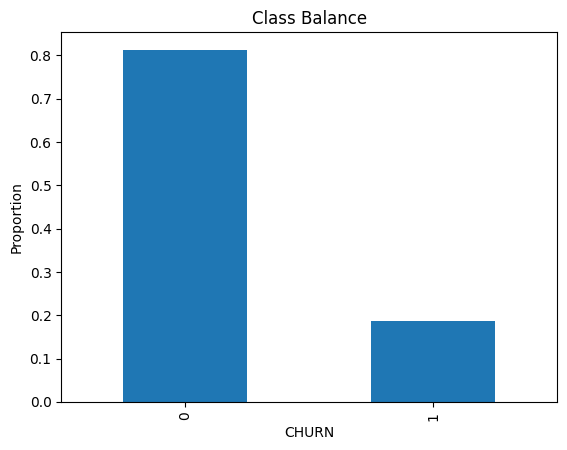

In [ ]:
# Plot class balance
df["CHURN"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="CHURN",
    ylabel="Proportion",
    title="Class Balance"
);

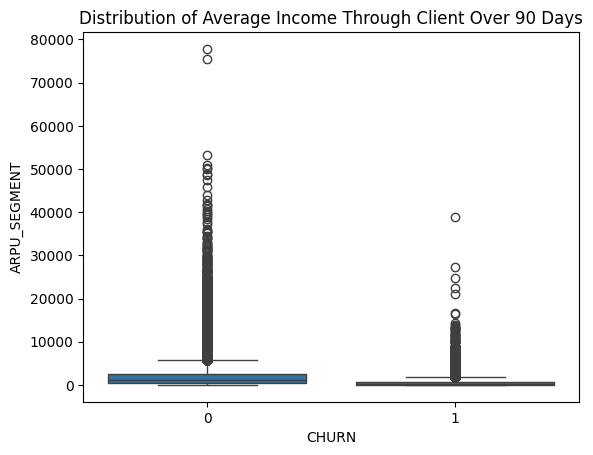

In [ ]:
# Create boxplot
sns.boxplot(x="CHURN", y="ARPU_SEGMENT", data=df)
plt.xlabel("CHURN")
plt.ylabel("ARPU_SEGMENT")
plt.title("Distribution of Average Income Through Client Over 90 Days");

In [ ]:
# Summary statistics for ARPU_SEGMENT
df["ARPU_SEGMENT"].describe().apply("{0:,.0f}".format)

,ARPU_SEGMENT
count,"265,337"
mean,"1,835"
std,"2,392"
min,0
25%,333
50%,"1,000"
75%,"2,447"
max,"77,804"


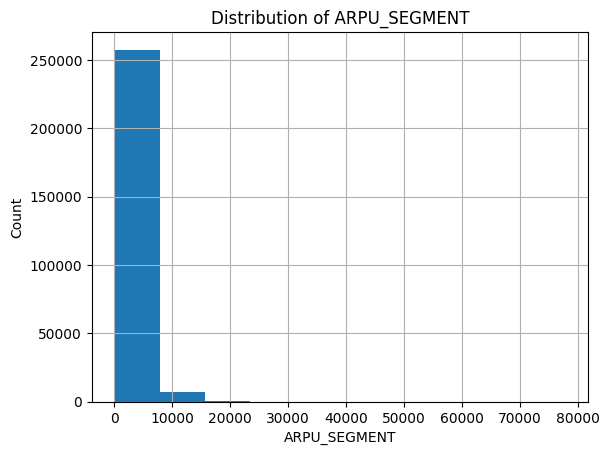

In [ ]:
# Plot histogram of ARPU_SEGMENT
df["ARPU_SEGMENT"].hist()
plt.xlabel("ARPU_SEGMENT")
plt.ylabel("Count")
plt.title("Distribution of ARPU_SEGMENT");

In [ ]:
q1, q9 = df["ARPU_SEGMENT"].quantile([0.1, 0.9])
mask = df["ARPU_SEGMENT"].between(q1, q9)
mask.head()

,ARPU_SEGMENT
0,False
1,True
2,True
3,True
4,True


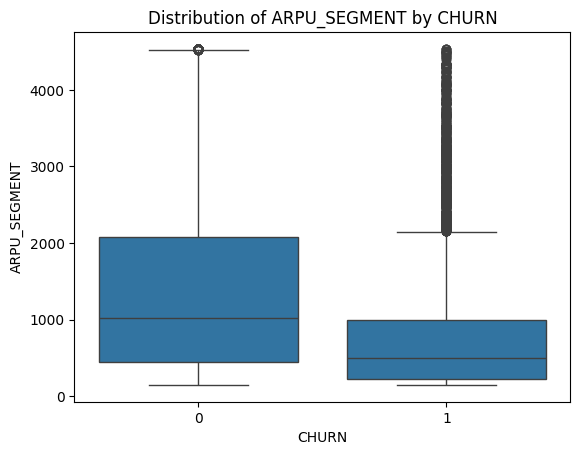

In [ ]:
# Create clipped box plot
sns.boxplot(x="CHURN", y="ARPU_SEGMENT", data=df[mask])
plt.xlabel("CHURN")
plt.ylabel("ARPU_SEGMENT")
plt.title("Distribution of ARPU_SEGMENT by CHURN");

In [ ]:
# Correlation
df.select_dtypes(include="number").corr()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
MONTANT,1.000000,0.800385,0.979041,0.979041,0.781164,0.308343,0.327857,0.667531,0.427289,0.350551,0.407973,0.524157,0.742406,-0.106229
FREQUENCE_RECH,0.800385,1.000000,0.807405,0.807405,0.956262,0.165226,0.402383,0.522649,0.348092,0.126573,0.160979,0.557178,0.866833,-0.123113
REVENUE,0.979041,0.807405,1.000000,1.000000,0.791627,0.312915,0.331850,0.670220,0.425376,0.355228,0.377622,0.534122,0.751785,-0.114822
ARPU_SEGMENT,0.979041,0.807405,1.000000,1.000000,0.791627,0.312915,0.331850,0.670220,0.425377,0.355228,0.377623,0.534120,0.751785,-0.114822
FREQUENCE,0.781164,0.956262,0.791627,0.791627,1.000000,0.181491,0.392656,0.475057,0.311898,0.113051,0.164952,0.591314,0.843150,-0.139685
DATA_VOLUME,0.308343,0.165226,0.312915,0.312915,0.181491,1.000000,-0.014683,0.066746,0.029573,0.034982,0.054873,0.198813,0.126535,-0.036015
ON_NET,0.327857,0.402383,0.331850,0.331850,0.392656,-0.014683,1.000000,0.218051,0.138315,0.010337,-0.018135,0.268487,0.351834,-0.057701
ORANGE,0.667531,0.522649,0.670220,0.670220,0.475057,0.066746,0.218051,1.000000,0.408712,0.042190,0.016740,0.310284,0.557338,-0.063382
TIGO,0.427289,0.348092,0.425376,0.425377,0.311898,0.029573,0.138315,0.408712,1.000000,0.006882,0.015626,0.197842,0.375953,-0.035890
ZONE1,0.350551,0.126573,0.355228,0.355228,0.113051,0.034982,0.010337,0.042190,0.006882,1.000000,0.041978,0.042619,0.187581,0.019937


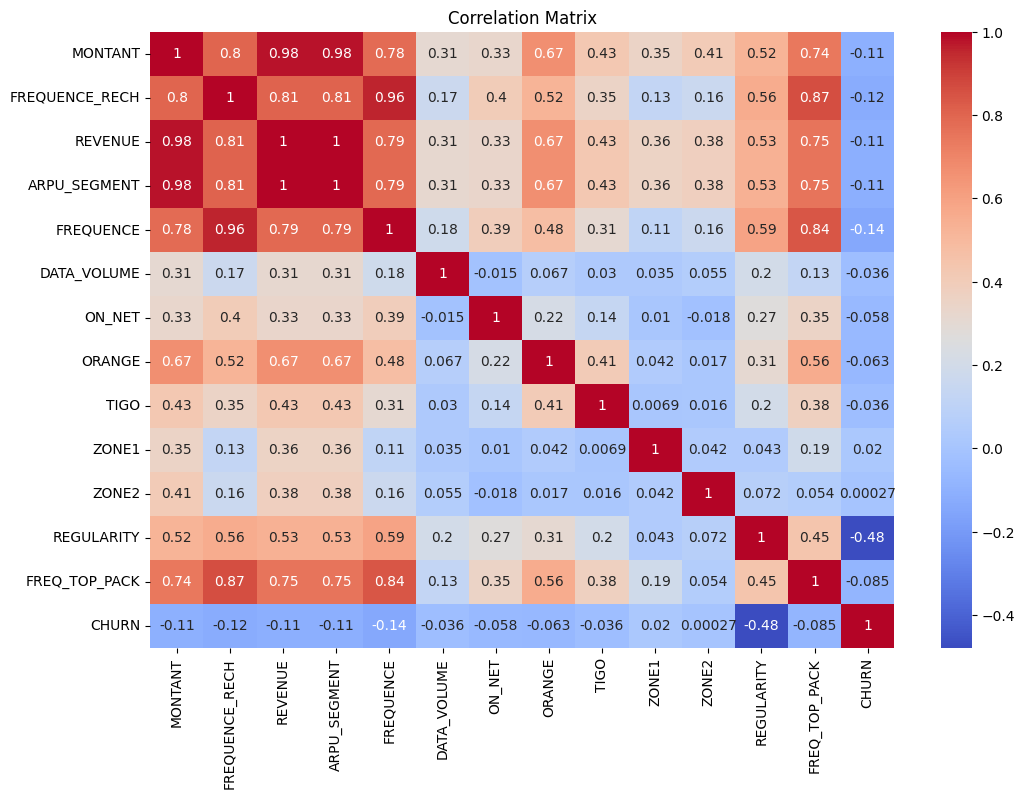

In [ ]:
corr = df.select_dtypes(include="number").corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show();

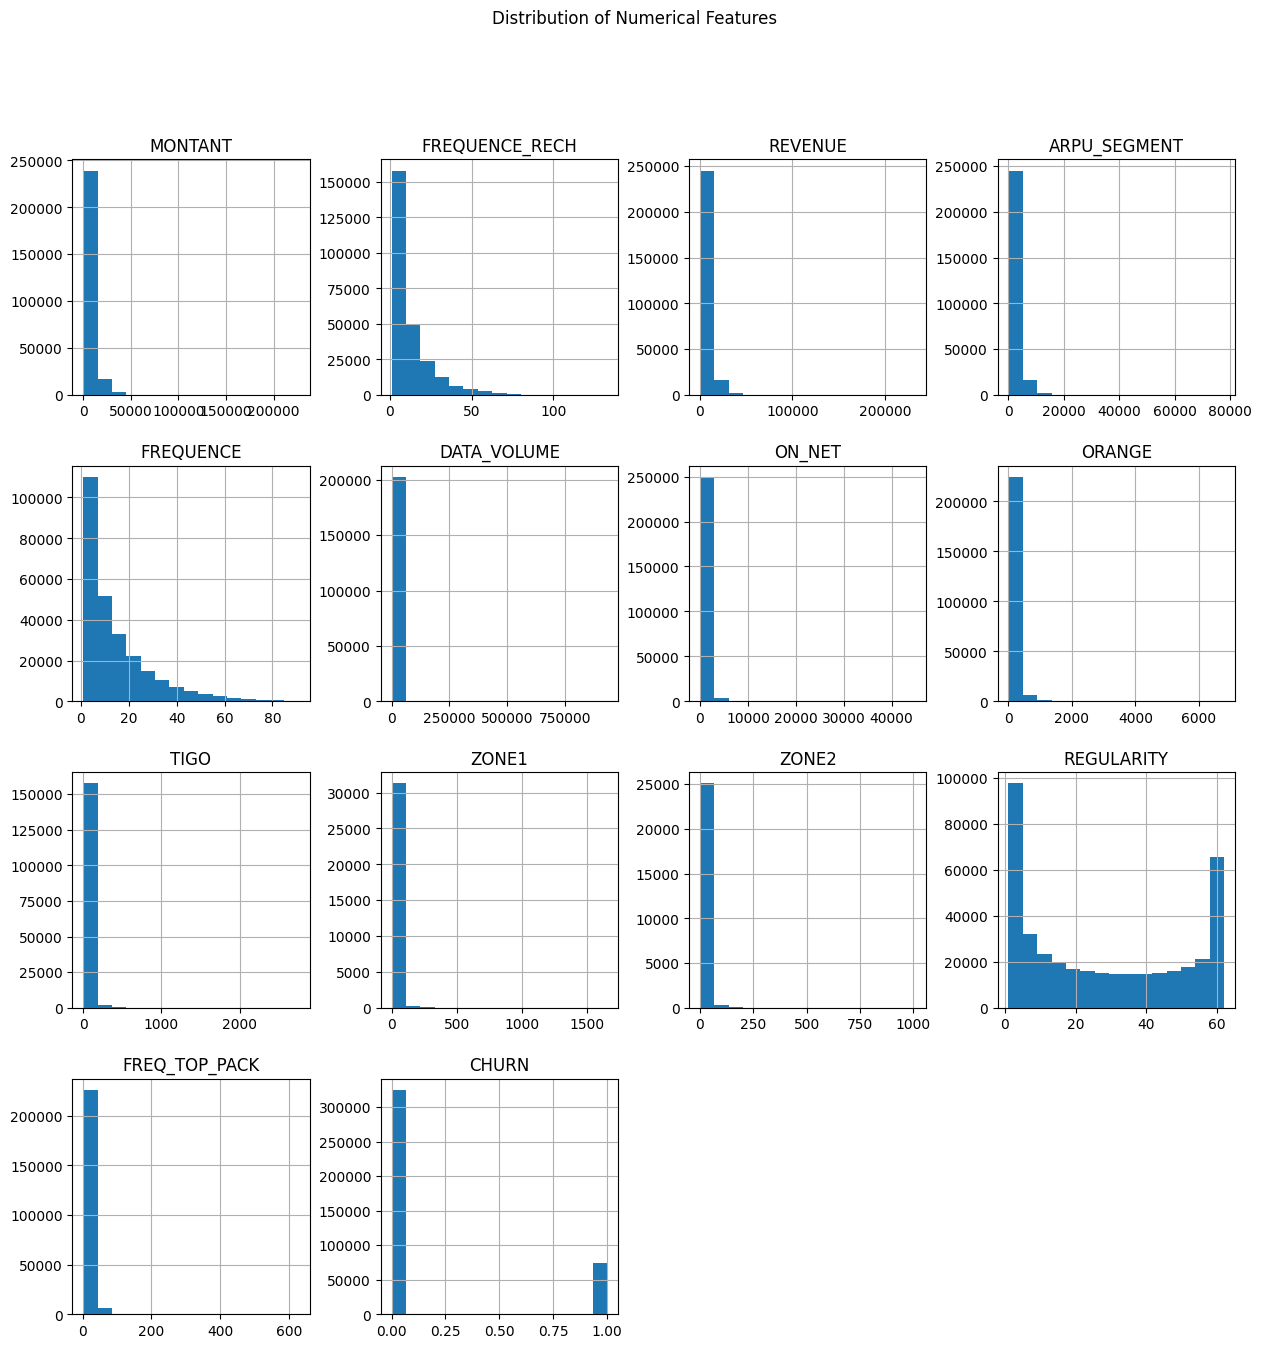

In [ ]:
# Plot histograms for numerical features
df.select_dtypes(include="number").hist(figsize=(15, 15), bins=15);
plt.suptitle('Distribution of Numerical Features')
plt.show()

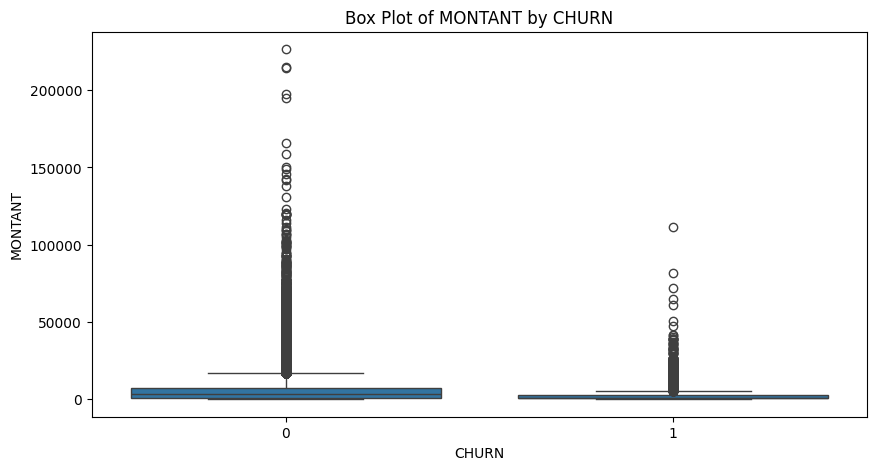

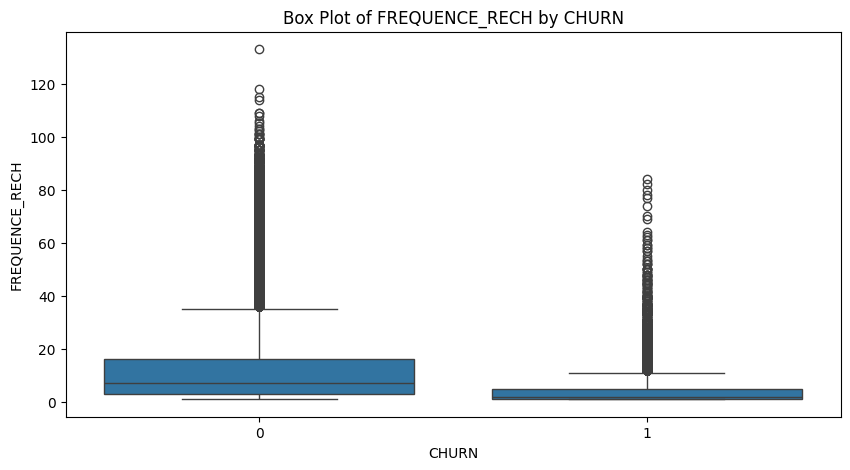

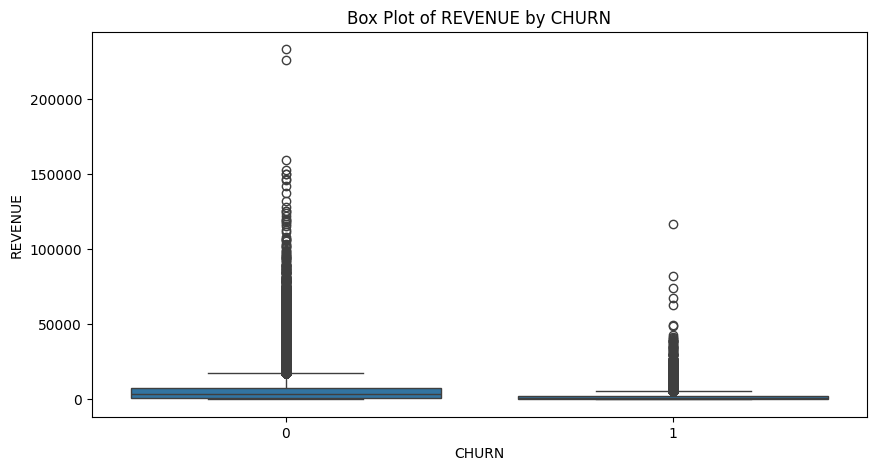

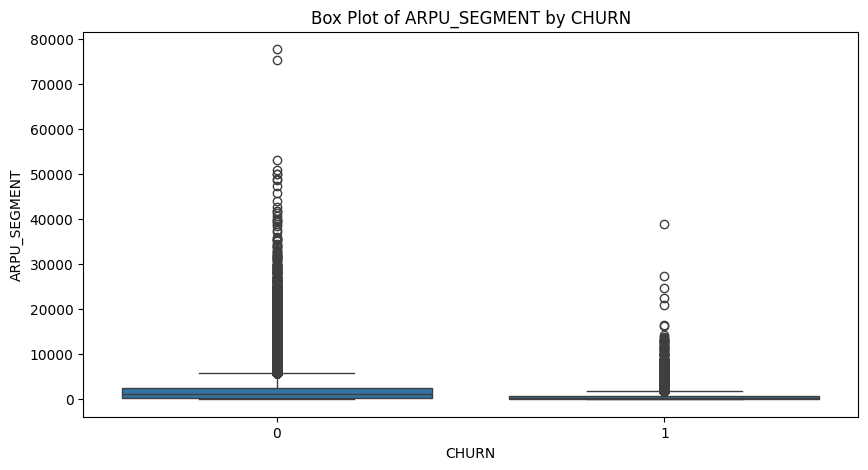

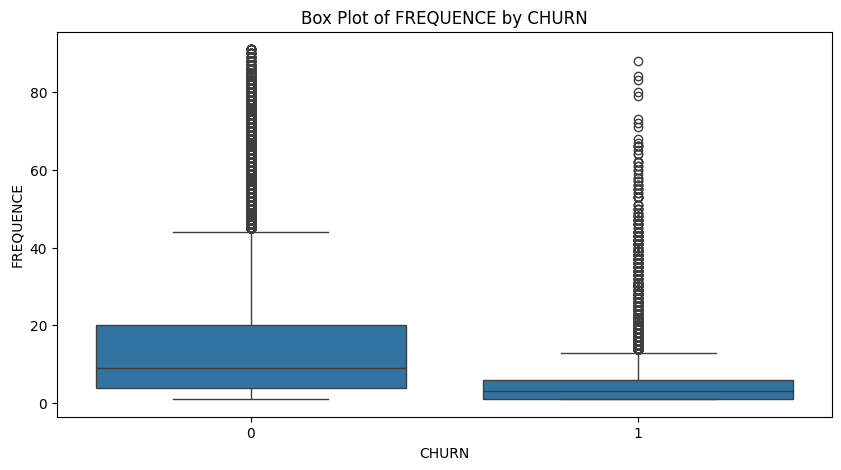

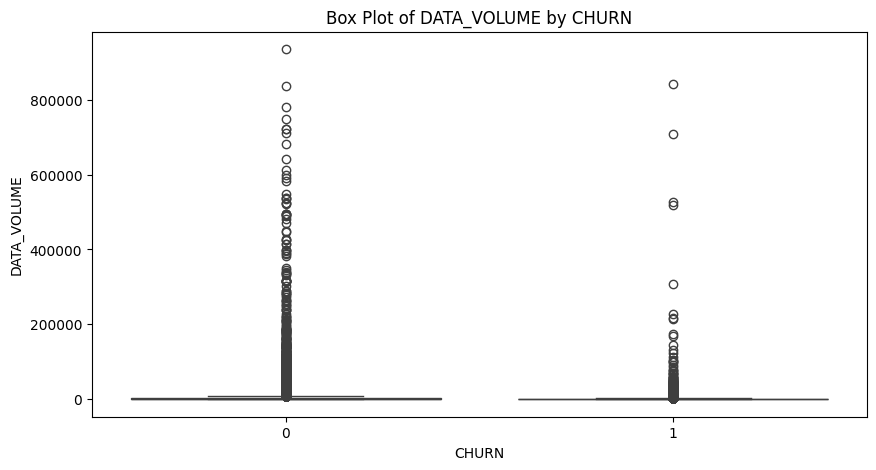

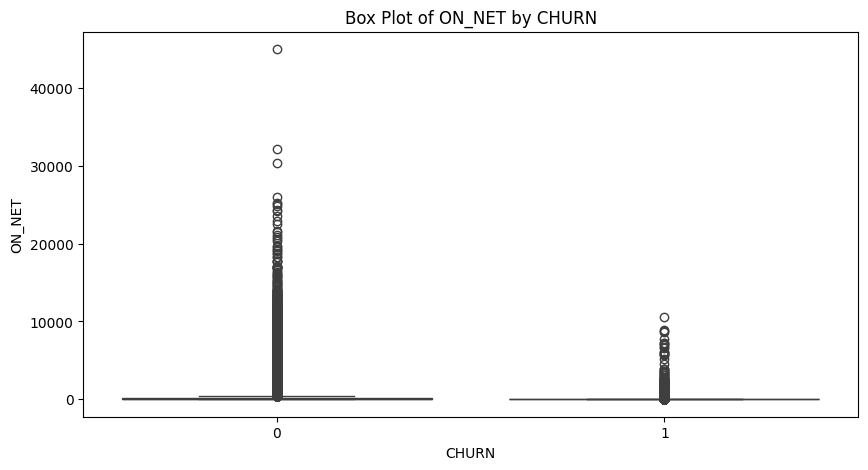

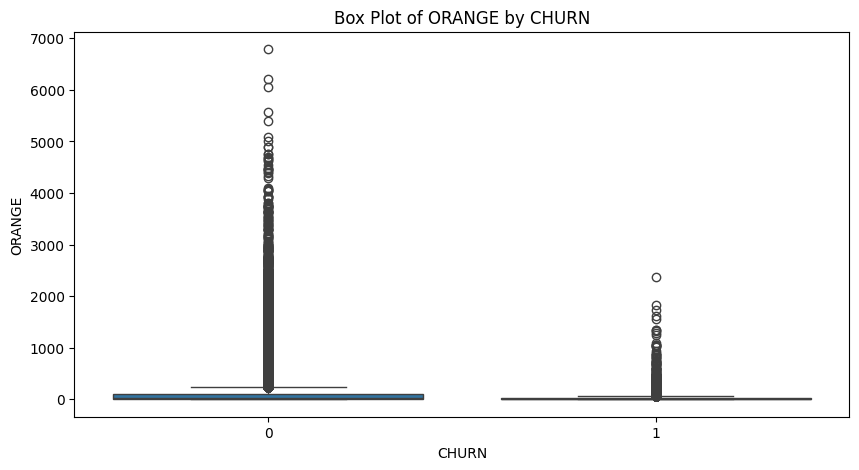

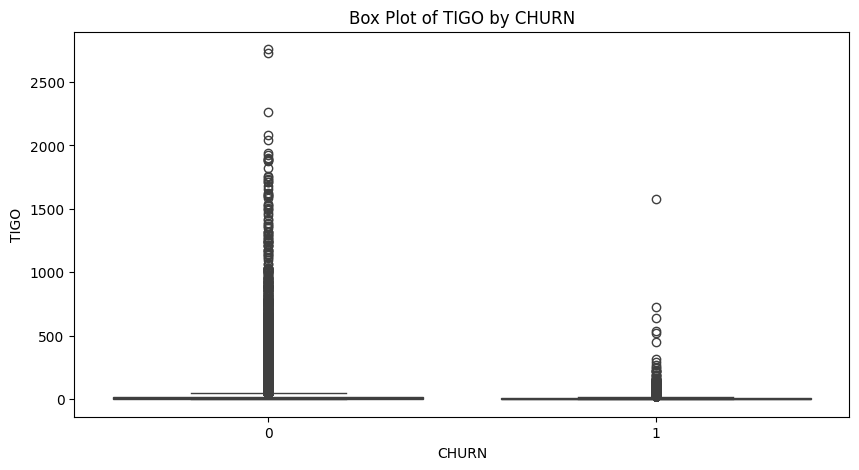

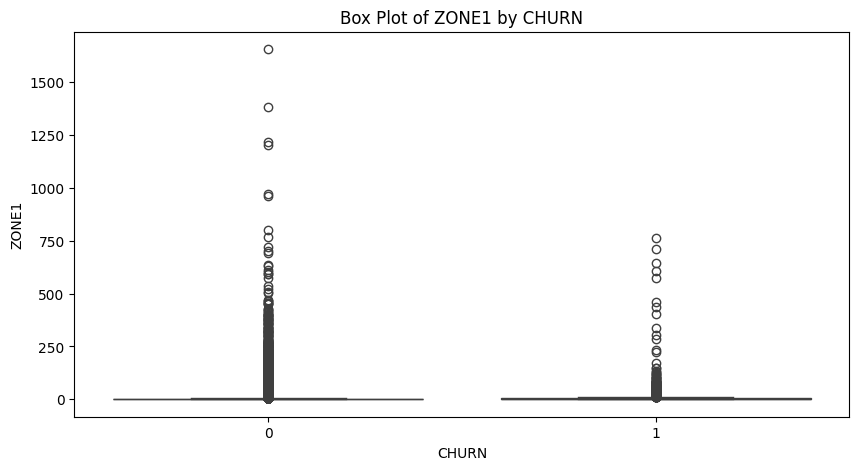

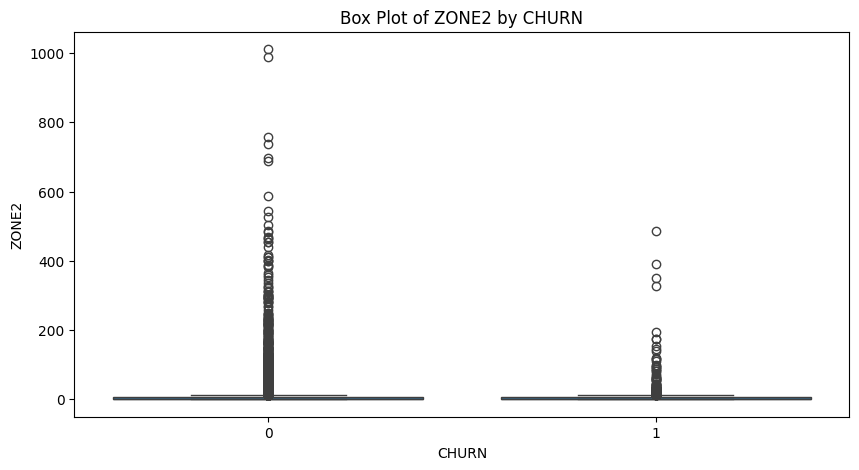

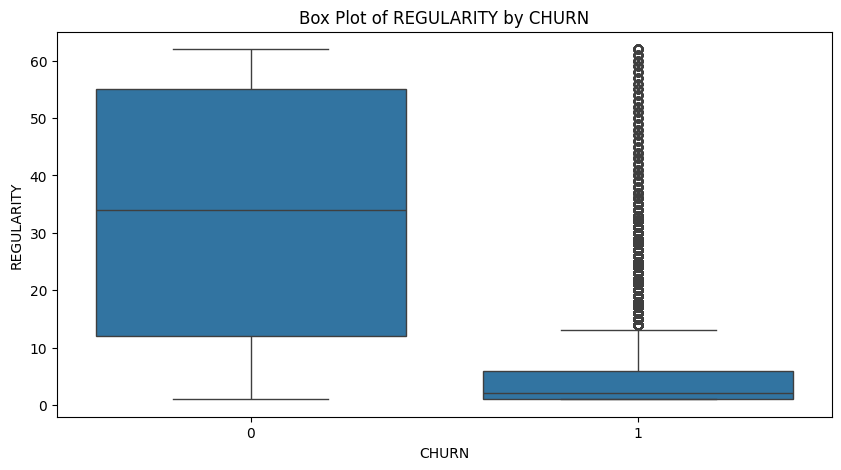

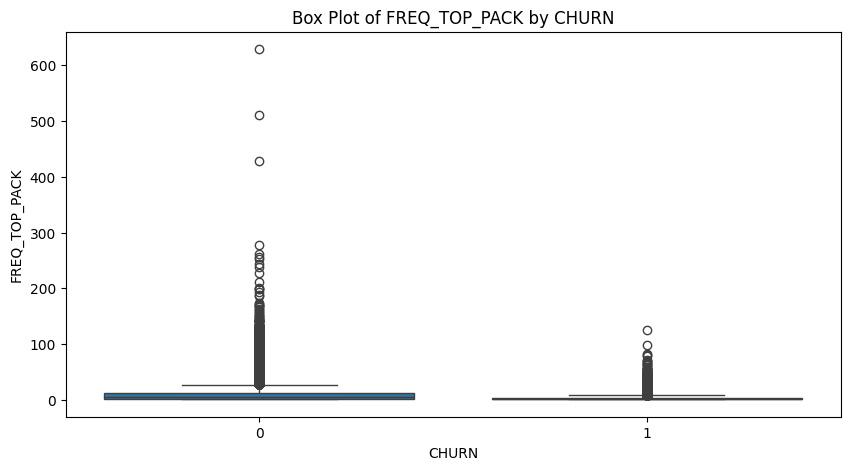

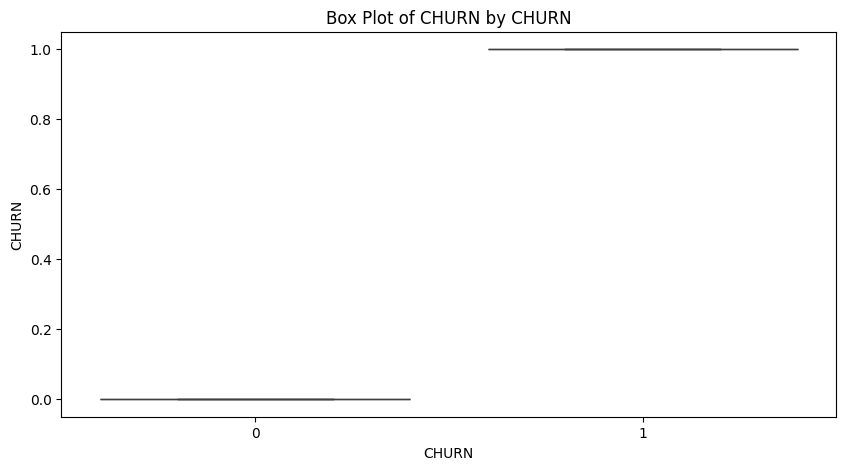

In [ ]:
# Plot box plots for numerical features
numerical_features = df.select_dtypes(include="number").columns
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='CHURN', y=col, data=df)
    plt.title(f'Box Plot of {col} by CHURN')
    plt.show();

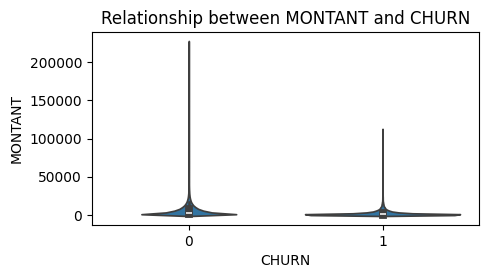

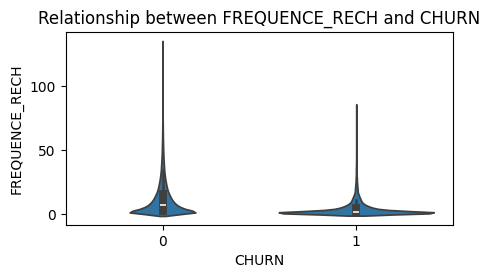

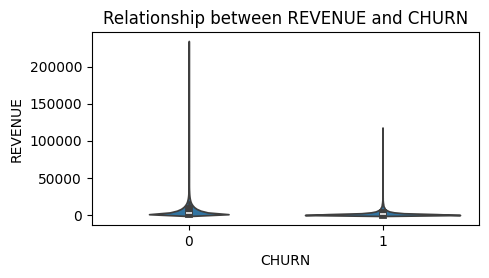

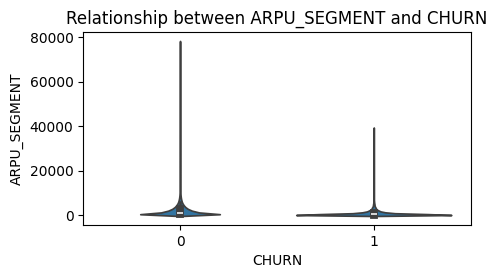

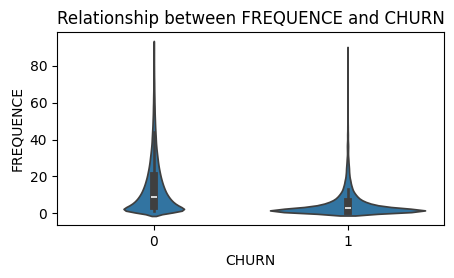

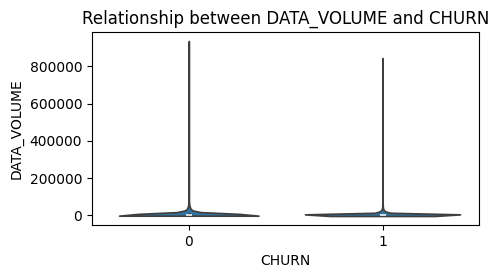

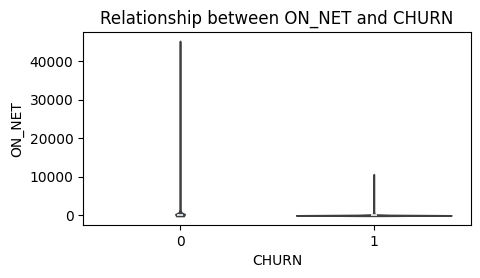

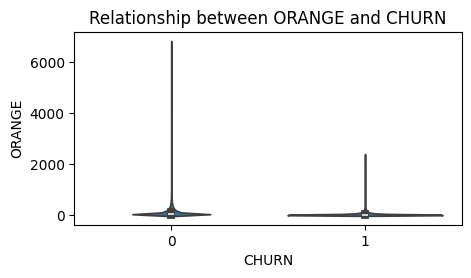

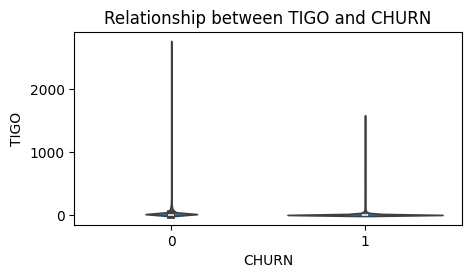

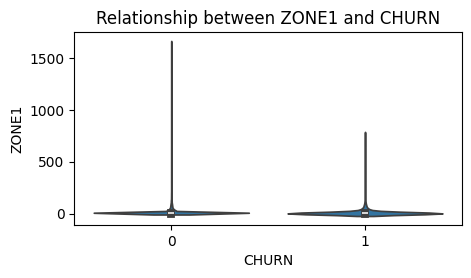

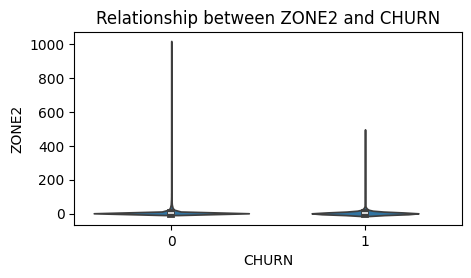

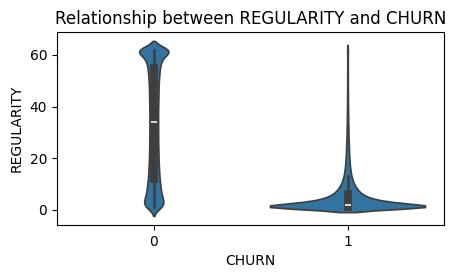

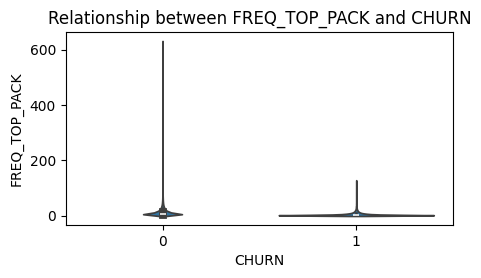

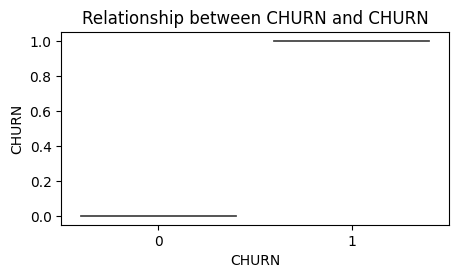

In [ ]:
# Plot the relationship between numerical features and the target variable
for col in numerical_features:
    plt.figure(figsize=(5, 2.5))
    sns.violinplot(x='CHURN', y=col, data=df)
    plt.title(f'Relationship between {col} and CHURN')
    plt.show()

In [ ]:
# Correlation of features with the target variable 'CHURN'
df.select_dtypes(include="number").corr()['CHURN'].sort_values(ascending=False)

,CHURN
CHURN,1.000000
ZONE1,0.019937
ZONE2,0.000273
TIGO,-0.035890
DATA_VOLUME,-0.036015
ON_NET,-0.057701
ORANGE,-0.063382
FREQ_TOP_PACK,-0.085136
MONTANT,-0.106229
REVENUE,-0.114822


In [ ]:
# View Overcorrelated columns
df[['REVENUE','ARPU_SEGMENT']]

,REVENUE,ARPU_SEGMENT
0,18000.0,6000.0
1,4427.0,1476.0
2,1500.0,500.0
3,2497.0,832.0
4,498.0,166.0
...,...,...
399995,704.0,235.0
399996,NaN,NaN
399997,699.0,233.0
399998,9.0,3.0


In [ ]:
df.drop(columns=['REVENUE'], inplace=True)

In [ ]:
# Percentage of Missing values
df.isnull().sum() / len(df) * 100

,0
user_id,0.00000
REGION,39.38000
TENURE,0.00000
MONTANT,35.06925
FREQUENCE_RECH,35.06925
REVENUE,33.66575
ARPU_SEGMENT,33.66575
FREQUENCE,33.66575
DATA_VOLUME,49.21350
ON_NET,36.45475


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         400000 non-null  object 
 1   REGION          242480 non-null  object 
 2   TENURE          400000 non-null  object 
 3   MONTANT         259723 non-null  float64
 4   FREQUENCE_RECH  259723 non-null  float64
 5   REVENUE         265337 non-null  float64
 6   ARPU_SEGMENT    265337 non-null  float64
 7   FREQUENCE       265337 non-null  float64
 8   DATA_VOLUME     203146 non-null  float64
 9   ON_NET          254181 non-null  float64
 10  ORANGE          233683 non-null  float64
 11  TIGO            160614 non-null  float64
 12  ZONE1           31690 non-null   float64
 13  ZONE2           25513 non-null   float64
 14  MRG             400000 non-null  object 
 15  REGULARITY      400000 non-null  int64  
 16  TOP_PACK        232671 non-null  object 
 17  FREQ_TOP_P

In [ ]:
# Drop columns with more than 50% missing values
df.drop(columns=['TIGO', 'ZONE1', 'ZONE2'], inplace=True)

In [ ]:
# Number of unique values in each column
df.nunique()

,0
user_id,400000
REGION,14
TENURE,8
MONTANT,2421
FREQUENCE_RECH,111
REVENUE,23760
ARPU_SEGMENT,11014
FREQUENCE,91
DATA_VOLUME,22229
ON_NET,5996


In [ ]:
# Drop high and low cardinality
df.drop(columns=['MRG', 'user_id'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   REGION          242480 non-null  object 
 1   TENURE          400000 non-null  object 
 2   MONTANT         259723 non-null  float64
 3   FREQUENCE_RECH  259723 non-null  float64
 4   ARPU_SEGMENT    265337 non-null  float64
 5   FREQUENCE       265337 non-null  float64
 6   DATA_VOLUME     203146 non-null  float64
 7   ON_NET          254181 non-null  float64
 8   ORANGE          233683 non-null  float64
 9   REGULARITY      400000 non-null  int64  
 10  TOP_PACK        232671 non-null  object 
 11  FREQ_TOP_PACK   232671 non-null  float64
 12  CHURN           400000 non-null  int64  
dtypes: float64(8), int64(2), object(3)
memory usage: 39.7+ MB


In [ ]:
# Encode catgorical columns with OrdnalEncoder
encoder = OrdinalEncoder()
df["REGION"] = encoder.fit_transform(df[["REGION"]])
df["TENURE"] = encoder.fit_transform(df[["TENURE"]])
df["TOP_PACK"] = encoder.fit_transform(df[["TOP_PACK"]])

In [ ]:
df["CHURN"].unique()

array([0, 1])

In [ ]:
# Vertical split

target = "CHURN"
X = df.drop(columns=target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (400000, 12)
y shape: (400000,)


In [ ]:
# Horizontal split: Splitting the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (320000, 12)
y_train shape: (320000,)
X_val shape: (80000, 12)
y_val shape: (80000,)


In [ ]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (520266, 12)


,REGION,TENURE,MONTANT,FREQUENCE_RECH,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,9.0,7.0,26500.0,40.0,8574.0,44.0,0.0,1517.0,33.0,62,89.0,39.0
1,0.0,7.0,500.0,1.0,173.0,2.0,1202.0,0.0,NaN,36,NaN,NaN
2,0.0,7.0,7000.0,13.0,2717.0,19.0,0.0,24.0,109.0,59,15.0,5.0
3,1.0,7.0,9100.0,29.0,2948.0,32.0,2595.0,393.0,37.0,49,78.0,9.0
4,0.0,7.0,4750.0,9.0,1584.0,12.0,4081.0,8.0,53.0,47,15.0,3.0


In [ ]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.8129


In [ ]:
# Initializing and training the CatBoostClassifier
clf = make_pipeline(SimpleImputer(), CatBoostClassifier(random_state=42, loss_function='Logloss', learning_rate=0.01, use_best_model=True, eval_metric='Logloss'))
clf

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x7a2e739b6e60>)])

In [ ]:
cv_acc_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs=-1, fit_params={'catboostclassifier__eval_set':(X_val, y_val)})
print(cv_acc_scores)


[0.86413785 0.86313706 0.86429031 0.86310822 0.86278147]


In [ ]:
params = {
    "simpleimputer__strategy": ["median"],
    "catboostclassifier__n_estimators": range(25, 100, 25),
    "catboostclassifier__max_depth": range(2, 16, 2)
}
params

{'simpleimputer__strategy': ['median'],
 'catboostclassifier__n_estimators': range(25, 100, 25),
 'catboostclassifier__max_depth': range(2, 16, 2)}

In [ ]:
model = GridSearchCV(
    clf, # classifier instantiated above
    param_grid=params, # passing defined parameters in dictionary above
    cv=5, # no. of cross_validation folds
    n_jobs=-1, # to allow model to function simultaneously
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('catboostclassifier',
                                        <catboost.core.CatBoostClassifier object at 0x7a2e739b6e60>)]),
             n_jobs=-1,
             param_grid={'catboostclassifier__max_depth': range(2, 16, 2),
                         'catboostclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['median']},
             verbose=1)

In [ ]:
# Train model
model.fit(X_train_over, y_train_over, catboostclassifier__eval_set=(X_val, y_val))

Fitting 5 folds for each of 21 candidates, totalling 105 fits
0:	learn: 0.6873799	test: 0.6870839	best: 0.6870839 (0)	total: 782ms	remaining: 57.9s
1:	learn: 0.6814627	test: 0.6812614	best: 0.6812614 (1)	total: 1.46s	remaining: 53.4s
2:	learn: 0.6758626	test: 0.6754911	best: 0.6754911 (2)	total: 2.25s	remaining: 53.9s
3:	learn: 0.6704294	test: 0.6698161	best: 0.6698161 (3)	total: 3.01s	remaining: 53.5s
4:	learn: 0.6650100	test: 0.6644826	best: 0.6644826 (4)	total: 3.78s	remaining: 52.9s
5:	learn: 0.6596916	test: 0.6590228	best: 0.6590228 (5)	total: 4.23s	remaining: 48.7s
6:	learn: 0.6545175	test: 0.6537660	best: 0.6537660 (6)	total: 4.67s	remaining: 45.4s
7:	learn: 0.6493374	test: 0.6485415	best: 0.6485415 (7)	total: 5.13s	remaining: 43s
8:	learn: 0.6444253	test: 0.6433130	best: 0.6433130 (8)	total: 5.58s	remaining: 40.9s
9:	learn: 0.6395974	test: 0.6384093	best: 0.6384093 (9)	total: 6.04s	remaining: 39.3s
10:	learn: 0.6347913	test: 0.6334731	best: 0.6334731 (10)	total: 6.28s	remaining

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('catboostclassifier',
                                        <catboost.core.CatBoostClassifier object at 0x7a2e739b6e60>)]),
             n_jobs=-1,
             param_grid={'catboostclassifier__max_depth': range(2, 16, 2),
                         'catboostclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['median']},
             verbose=1)

In [ ]:
model.best_params_

{'catboostclassifier__max_depth': 14,
 'catboostclassifier__n_estimators': 75,
 'simpleimputer__strategy': 'median'}

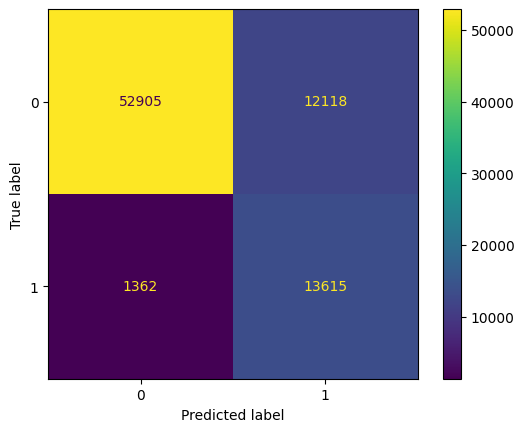

In [ ]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_val, y_val);

In [ ]:
# Print classification report
print(classification_report(y_val, model.predict(X_val)))

              precision    recall  f1-score   support

           0       0.97      0.81      0.89     65023
           1       0.53      0.91      0.67     14977

    accuracy                           0.83     80000
   macro avg       0.75      0.86      0.78     80000
weighted avg       0.89      0.83      0.85     80000



In [ ]:
importances = model.best_estimator_.named_steps[
    "catboostclassifier"].feature_importances_
importances

array([73.87450537,  0.32142523,  2.14393761,  0.66310525,  1.1489379 ,
        0.4611076 ,  1.64778321,  1.44380119,  0.90549136, 15.70671337,
        1.49553605,  0.18765586])

In [ ]:
feat_imp = pd.Series(importances, index=X_train.columns).sort_values()
feat_imp.head()

,0
FREQ_TOP_PACK,0.187656
TENURE,0.321425
FREQUENCE,0.461108
FREQUENCE_RECH,0.663105
ORANGE,0.905491


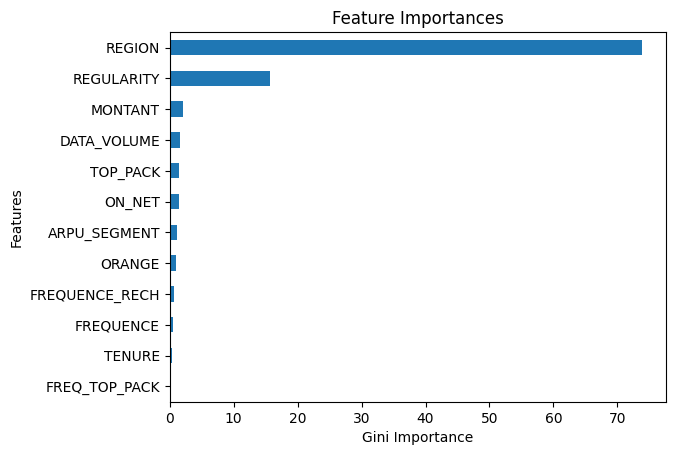

In [ ]:
# Get feature names from training data
features = X_train.columns

# Extract importance from model
importances = model.best_estimator_.named_steps[
    "catboostclassifier"].feature_importances_

# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()

# Plot the feature importances
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Features")
plt.title("Feature Importances");

In [ ]:
log_loss(y_train, model.predict_proba(X_train))

0.4548841741093201

In [ ]:
# Load Test dataset
df1 = pd.read_csv("/content/Test.csv")
df1.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
1,5335efd940280b82143272275637d1e65d37eadb,NaN,K > 24 month,NaN,NaN,10.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,a581f4fa08677c26f83f643248c667e241043086,NaN,K > 24 month,1900.0,15.0,2299.0,766.0,21.0,414.0,NaN,7.0,2.0,NaN,NaN,NO,27,"Data: 100 F=40MB,24H",17.0
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,DAKAR,K > 24 month,3000.0,9.0,2603.0,868.0,14.0,332.0,0.0,23.0,4.0,NaN,NaN,NO,46,IVR Echat_Daily_50F,3.0
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,DAKAR,K > 24 month,32000.0,47.0,33000.0,11000.0,47.0,NaN,128.0,555.0,280.0,NaN,NaN,NO,61,All-net 500F=2000F;5d,65.0


In [ ]:
df1.shape

(100000, 18)

In [ ]:
df1.isnull().sum() / len(df1) * 100

,0
user_id,0.000
REGION,39.293
TENURE,0.000
MONTANT,34.951
FREQUENCE_RECH,34.951
REVENUE,33.490
ARPU_SEGMENT,33.490
FREQUENCE,33.490
DATA_VOLUME,49.338
ON_NET,36.383


In [ ]:
# Drop columns with more than 50% missing values
df1.drop(columns=['TIGO', 'ZONE1', 'ZONE2'], inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         100000 non-null  object 
 1   REGION          60707 non-null   object 
 2   TENURE          100000 non-null  object 
 3   MONTANT         65049 non-null   float64
 4   FREQUENCE_RECH  65049 non-null   float64
 5   REVENUE         66510 non-null   float64
 6   ARPU_SEGMENT    66510 non-null   float64
 7   FREQUENCE       66510 non-null   float64
 8   DATA_VOLUME     50662 non-null   float64
 9   ON_NET          63617 non-null   float64
 10  ORANGE          58800 non-null   float64
 11  MRG             100000 non-null  object 
 12  REGULARITY      100000 non-null  int64  
 13  TOP_PACK        58297 non-null   object 
 14  FREQ_TOP_PACK   58297 non-null   float64
dtypes: float64(9), int64(1), object(5)
memory usage: 11.4+ MB


In [ ]:
# Drop high and low cardinality columns
df1.drop(columns=['MRG', 'user_id'], inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   REGION          60707 non-null   object 
 1   TENURE          100000 non-null  object 
 2   MONTANT         65049 non-null   float64
 3   FREQUENCE_RECH  65049 non-null   float64
 4   REVENUE         66510 non-null   float64
 5   ARPU_SEGMENT    66510 non-null   float64
 6   FREQUENCE       66510 non-null   float64
 7   DATA_VOLUME     50662 non-null   float64
 8   ON_NET          63617 non-null   float64
 9   ORANGE          58800 non-null   float64
 10  REGULARITY      100000 non-null  int64  
 11  TOP_PACK        58297 non-null   object 
 12  FREQ_TOP_PACK   58297 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 9.9+ MB


In [ ]:
# Drop REVENUE
df1.drop(columns=['REVENUE'], inplace=True)

In [ ]:
encoder = OrdinalEncoder()
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = encoder.fit_transform(df1[[col]])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   REGION          60707 non-null   float64
 1   TENURE          100000 non-null  float64
 2   MONTANT         65049 non-null   float64
 3   FREQUENCE_RECH  65049 non-null   float64
 4   REVENUE         66510 non-null   float64
 5   ARPU_SEGMENT    66510 non-null   float64
 6   FREQUENCE       66510 non-null   float64
 7   DATA_VOLUME     50662 non-null   float64
 8   ON_NET          63617 non-null   float64
 9   ORANGE          58800 non-null   float64
 10  REGULARITY      100000 non-null  int64  
 11  TOP_PACK        58297 non-null   float64
 12  FREQ_TOP_PACK   58297 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 9.9 MB


In [ ]:
imputer = SimpleImputer(strategy="median")
for col in df1.select_dtypes(include="number").columns:
  if df1[col].isnull().any(): # check if any columns has missing values
    df1[col] = imputer.fit_transform(df1[[col]])

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   REGION          100000 non-null  float64
 1   TENURE          100000 non-null  float64
 2   MONTANT         100000 non-null  float64
 3   FREQUENCE_RECH  100000 non-null  float64
 4   REVENUE         100000 non-null  float64
 5   ARPU_SEGMENT    100000 non-null  float64
 6   FREQUENCE       100000 non-null  float64
 7   DATA_VOLUME     100000 non-null  float64
 8   ON_NET          100000 non-null  float64
 9   ORANGE          100000 non-null  float64
 10  REGULARITY      100000 non-null  int64  
 11  TOP_PACK        100000 non-null  float64
 12  FREQ_TOP_PACK   100000 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 9.9 MB


In [ ]:
pred = df1[["REGION", "TENURE", "MONTANT", "FREQUENCE_RECH", "ARPU_SEGMENT", "FREQUENCE", "DATA_VOLUME",
             "ON_NET", "ORANGE", "REGULARITY", "TOP_PACK", "FREQ_TOP_PACK"]]

In [ ]:
# Predict likelyhood of Customers churnning
predictions = model.predict_proba(pred)[:, -1]
predictions

array([0.67972805, 0.64957232, 0.45694444, ..., 0.33198189, 0.27601782,
       0.37820787])

In [ ]:
sample_sub = pd.read_csv("/content/sample_submission.csv")

In [ ]:
pred_submission = sample_sub.copy()
pred_submission['CHURN'] = predictions
pred_submission.to_csv('predictionsWithRevCol_submission_CatBoost_expresso.csv', index=False)

# Display the first few rows of the submission file
pred_submission.head()

,user_id,CHURN
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,0.679728
1,5335efd940280b82143272275637d1e65d37eadb,0.649572
2,a581f4fa08677c26f83f643248c667e241043086,0.456944
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,0.241678
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,0.236974


In [ ]:
 #Save model
import pickle
with open("model-1-3.pkl", "wb") as f:
    pickle.dump(model, f)

In [ ]:
import pickle

file_path = '/content/model-1-3.pkl'

try:
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    print(data)
except FileNotFoundError:
    print(f"File not found: {file_path}")
except pickle.UnpicklingError:
    print("Error: The file content is not a valid pickle format.")
except EOFError:
    print("Error: The file is incomplete or corrupted.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('catboostclassifier',
                                        <catboost.core.CatBoostClassifier object at 0x7a2e7041c4f0>)]),
             n_jobs=-1,
             param_grid={'catboostclassifier__max_depth': range(2, 16, 2),
                         'catboostclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['median']},
             verbose=1)


In [ ]:
model = data

In [ ]:
model.predict_proba(pred)[:, -1]

array([0.67972805, 0.64957232, 0.45694444, ..., 0.33198189, 0.27601782,
       0.37820787])